In [5]:
import numpy as np

class SoftmaxRegression:
    def __init__(self, input_dim, num_classes, learning_rate=0.01, num_iters=1000):
        # 初始化参数
        self.W = np.random.randn(num_classes, input_dim) * 0.01  # 随机初始化权重矩阵
        self.b = np.zeros(num_classes)                          # 初始化偏置向量
        self.learning_rate = learning_rate                      # 学习率
        self.num_iters = num_iters                              # 迭代次数

    def softmax(self, z):
        # Softmax函数，确保数值稳定性
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def predict_proba(self, X):
        # 计算预测概率
        linear_output = np.dot(X, self.W.T) + self.b  # 注意这里直接使用了偏置向量b
        return self.softmax(linear_output)

    def predict(self, X):
        # 返回预测类别
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=0)

    def compute_loss(self, X, y):
        # 计算交叉熵损失
        m = X.shape[0]
        proba = self.predict_proba(X)
        log_proba = np.log(proba + 1e-9)  # 数值稳定性
        return -np.sum(y * log_proba) / m

    def compute_gradient(self, X, y):
        # 计算梯度
        m = X.shape[0]
        proba = self.predict_proba(X)
        gradient_W = np.dot(X.T, (proba - y)) / m
        gradient_b = np.sum(proba - y, axis=0) / m
        return gradient_W, gradient_b

    def fit(self, X, y):
        # 训练模型
        for i in range(self.num_iters):
            gradient_W, gradient_b = self.compute_gradient(X, y)
            self.W -= self.learning_rate * gradient_W
            self.b -= self.learning_rate * gradient_b
            if i % 100 == 0:  # 每100次迭代打印一次损失
                loss = self.compute_loss(X, y)
                print(f"Iteration {i}: Loss = {loss}")

# 示例数据
# 假设有4个样本，每个样本有3个特征，类别数为3
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])  # 特征矩阵
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]])     # 独热编码的标签矩阵

# 初始化模型并训练（注意：这里X没有添加偏置列，因为我们在计算linear_output时直接加了b）
model = SoftmaxRegression(input_dim=X.shape[1], num_classes=y.shape[0], learning_rate=0.1, num_iters=1000)
model.fit(X, y)

# 预测
predictions = model.predict(X)
print("Predictions:", predictions)

ValueError: operands could not be broadcast together with shapes (4,4) (4,3) 

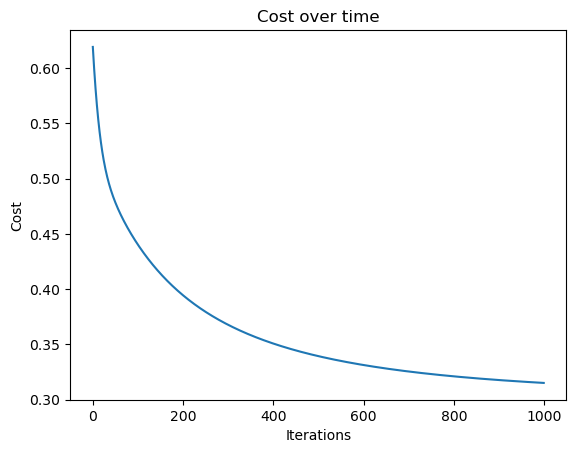

IndexError: index 2 is out of bounds for axis 0 with size 2

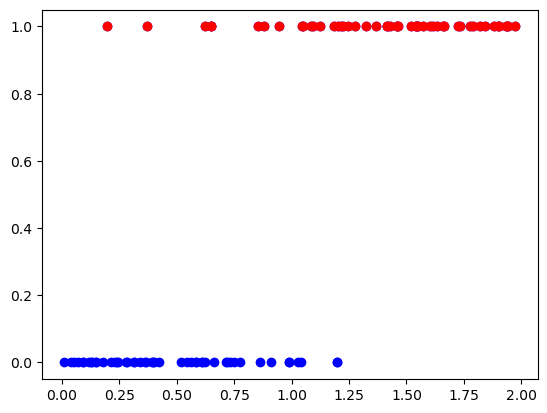

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))
def predict_prob(X, theta):  
    return sigmoid(np.dot(X, theta))
def compute_loss(X, y, theta):  
    m = len(y)  
    h = predict_prob(X, theta)  
    epsilon = 1e-15  # 防止log(0)  
    h_clipped = np.clip(h, epsilon, 1 - epsilon)  
    log_likelihood = -np.sum(y * np.log(h_clipped) + (1 - y) * np.log(1 - h_clipped))  
    return log_likelihood / m

def compute_gradient(X, y, theta):  
    m = len(y)  
    h = predict_prob(X, theta)  
    gradient = (1 / m) * np.dot(X.T, (h - y))  
    return gradient
def gradient_descent(X, y, theta, learning_rate, num_iterations):  
    m = len(y)  #样本数
    cost_history = np.zeros(num_iterations)  
      
    for i in range(num_iterations):  
        gradient = compute_gradient(X, y, theta)  
        theta = theta - learning_rate * gradient  #梯度下降
        cost_history[i] = compute_loss(X, y, theta)  
          
    return theta, cost_history
# 生成数据  
np.random.seed(42)  
X = 2 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)  
y = (y > 6.5).astype(int)  # 简单的二分类  
  
# 添加偏置项b  
X_b = np.c_[np.ones((100, 1)), X]  # 添加一列1作为偏置项
# 初始化参数  
theta = np.random.randn(2, 1)  
learning_rate = 0.1  
num_iterations = 1000  
  
# 训练模型  
theta_opt, cost_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations)
# 绘制损失函数的变化  
plt.plot(range(num_iterations), cost_history)  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Cost over time')  
plt.show()  
  
# 绘制决策边界  
def plot_decision_boundary(X, y, theta):  
    plt.scatter(X[:, 1], y, color='blue', label='y=0')  
    plt.scatter(X[y==1, 1], y[y==1], color='red', label='y=1')  
      
    x_vals = np.array([-2, 2])  
    y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]  
    plt.plot(x_vals, y_vals, label='Decision Boundary')  
      
    plt.xlabel('X1')  
    plt.ylabel('y')  
    plt.legend()  
    plt.show()  
  
# 注意：这里的theta[2]对应的是X2的系数，因为X_b包含了偏置项，所以theta[0]是偏置项  
plot_decision_boundary(X_b, y.flatten(), theta_opt)

In [50]:
import numpy as np  
class LogisticRegression:  
    def __init__(self,X,y, learning_rate=0.01, num_iterations=1000, solver='gd', tol=1e-4, C=1.0, verbose=False): 
        # print(y)
        self.labels=len(y[1]) #标签数
        # print("labels",self.labels)
        self.samples_num=X.shape[0] 
        self.features_num=X.shape[1]


        ones=np.ones((X.shape[0],1))
        self.dataX=np.c_[ones,X]
        self.y=y
        self.learning_rate=learning_rate
        self.num_iterations=num_iterations
        self.solver=solver
        self.tol=tol
        self.C=C
        self.verbose=verbose
        self.theta=np.zeros((self.dataX.shape[1], self.labels)) # 参数初始化
        self.loss_history=[]
        self.theta_history=[]
        self.fit()
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    def fit(self):
        if self.solver=='gd':
            self.gradient_descent()
        elif self.solver=='sgd':
            self.stochastic_gradient_descent()
        elif self.solver=='newton':
            self.newton_method()
    def gradient_descent(self):
        for i in range(self.num_iterations):
            # print("self.dataX.shape",self.dataX.shape)
            # print("self.theta.shape",self.theta.shape)
            z=np.dot(self.dataX,self.theta)
            # print(z)
            # print("z.shape",z.shape)

            y_pred=self.softmax(z)
            # print(y_pred)
            # print("self.y",self.y)
            loss=-np.sum(self.y*np.log(y_pred))/self.samples_num
            self.loss_history.append(loss)
            self.theta_history.append(self.theta)
            gradient=np.dot(self.dataX.T,(y_pred-self.y))/self.samples_num
            self.theta-=self.learning_rate*gradient
            if self.verbose and i%100==0:
                print('Iteration %d, Loss: %f'%(i,loss))
    def predict(self,X):
        ones=np.ones((X.shape[0],1))
        dataX=np.c_[ones,X]
        z=np.dot(dataX,self.theta)
        y_pred=self.softmax(z)
        print(y_pred)
        return np.argmax(y_pred,axis=1)

    

In [5]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = np.dot(A, B)
print("numpyarray.com - Matrix multiplication result:\n", C)


numpyarray.com - Matrix multiplication result:
 [[19 22]
 [43 50]]


In [3]:
import numpy as np

# 假设 y_train 是你的原始标签数组
y_train = np.array([0, 2, 1, 2, 0])

# 使用 numpy 的 unique() 函数来获取所有唯一的标签
unique_labels = np.unique(y_train)

# 确定 one-hot 编码矩阵的列数
num_classes = len(unique_labels)

# 创建一个形状为 (len(y_train), num_classes) 的零矩阵
y_train_one_hot = np.zeros((len(y_train), num_classes))

# 创建一个从唯一标签到列索引的映射
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# 使用映射来设置正确的位置为 1
y_train_one_hot[np.arange(len(y_train)), [label_to_index[label] for label in y_train]] = 1

# 保存原始的标签值
original_labels = y_train.copy()  # 使用 copy() 以确保不修改原始数组

# 现在你可以使用 y_train_one_hot 进行训练或处理
# 当你需要原始的标签时，可以引用 original_labels

# 示例：打印原始的标签和 one-hot 编码的矩阵
print("Original Labels:", original_labels)
print("One-Hot Encoded Labels:\n", y_train_one_hot)

Original Labels: [0 2 1 2 0]
One-Hot Encoded Labels:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [31]:
def softmax(z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

In [33]:
a=[[1,2],[2,4]]
b=softmax(a)
b

array([[0.26894142, 0.73105858],
       [0.11920292, 0.88079708]])

In [36]:
y_pred=np.array([0.1,0.2,0.3,0.4])
y=np.array([0,0,1,0])
samples_num=y.shape[0]

loss=-np.sum(y*np.log(y_pred + 1e-9))/samples_num
loss

0.3009932002481506

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import numpy as np  
def one_hot_encode(y):
    # 使用 numpy 的 unique() 函数来获取所有唯一的标签
    unique_labels = np.unique(y)
    # 确定 one-hot 编码矩阵的列数
    num_classes = len(unique_labels)
    # 创建一个形状为 (len(y_trai), num_classes) 的零矩阵
    y_train_one_hot = np.zeros((len(y), num_classes))
    # 创建一个从唯一标签到列索引的映射
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    # 使用映射来设置正确的位置为 1
    y_train_one_hot[np.arange(len(y)), [label_to_index[label] for label in y]] = 1
    return y_train_one_hot

def evaluate_classifier_multiple_times(classifier, X, y, learning_rate=0.01, num_iterations=1000,verbose=False,n_iterations=10):  
    all_accuracies = []  
    all_f1_scores = []  
  
    for iteration in range(n_iterations):  
        # 设置十折交叉验证，每次使用不同的random_state  
        kf = KFold(n_splits=10, shuffle=True, random_state=42 + iteration * 10)  # 使用迭代次数作为随机种子  
        scores = []  
        f1_scores_iter = []  
  
        # 遍历交叉验证的每一折  
        for fold, (train_index, test_index) in enumerate(kf.split(X)):  
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
  
            # 将pandas读取的数据转化为list形式
            X_train = X_train.values.tolist()  
            y_train = y_train.values.tolist()  
            # X_test = X_test.values.tolist()  
            y_test = y_test.values.tolist()  
           
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            y_train_one_hot=one_hot_encode(y_train)
            # y_test_one_hot=one_hot_encode(y_test)
            
            
            lr = classifier.LogisticRegression(X_train,y_train_one_hot, learning_rate, num_iterations,verbose=verbose)
            # print('训练后参数',lr.theta)
            y_pred=lr.predict(X_test)
            # one_hot索引原坐标问题，本预测要求，数据集标签从1开始，而预测的标签从0开始且连续不间断，所以预测的标签需要+1
            # Original Labels: [0 2 1 2 0]
            # One-Hot Encoded Labels:
            # [[1. 0. 0.]
            # [0. 0. 1.]
            # [0. 1. 0.]
            # [0. 0. 1.]
            # [1. 0. 0.]]

            y_pred=y_pred+1
            # y_pred_one_hot=one_hot_encode(y_pred)
            # print('y_pred',y_pred,len(y_pred))
            # print('y_test',y_test,len(y_test))
            accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)  
            f1 = f1_score(y_test, y_pred, average='macro')  
            scores.append(accuracy)  
            f1_scores_iter.append(f1)  
  
        mean_accuracy = np.mean(scores)  
        std_accuracy = np.std(scores)  
        mean_f1 = np.mean(f1_scores_iter)  
        print(f'第{iteration}次',mean_accuracy)  
        all_accuracies.append(mean_accuracy)  
        all_f1_scores.append(mean_f1)  
  
        # print(f"Iteration {iteration + 1}: Mean Accuracy = {mean_accuracy:.4f}, Std Accuracy = {std_accuracy:.4f}, Mean F1 Score = {mean_f1:.4f}")  

    overall_mean_accuracy = np.mean(all_accuracies)  
    overall_std_accuracy = np.std(all_accuracies)  
    overall_mean_f1 = np.mean(all_f1_scores)  
  
    return overall_mean_accuracy, overall_std_accuracy, overall_mean_f1  
  
# # 示例调用  
# # classifier_instance = YourClassifier()  # 替换为你的分类器实例  
# # X = your_X_data  # 替换为你的特征数据  
# # y = your_y_data  # 替换为你的标签数据  
# # k = your_k_value  # 替换为你的k值  
# # evaluate_classifier_multiple_times(classifier_instance, X, y, k)


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from package_py import LogisticRegression6

    
file_paths =[ "data\\bal.xls"]  # 实际文件路径
# file_paths =[ "data\\bal.xls", "data\\gla.xls", "data\\hay.xls", "data\\iri.xls", "data\\new.xls", "data\\win.xls", "data\\zoo.xls"]  # 实际文件路径
# mean_accuracys=[]
for i in range(len(file_paths)):
    file_path=file_paths[i]

    data = pd.read_excel(file_path, header=None)  
    # 将数据分为特征和标签  
    X = data.iloc[:, :-1]  # 前n列是特征  
    y = data.iloc[:, -1]   # 最后一列是分类标签  
    
    # 数据标准hua
    scaler = StandardScaler()  
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    mean_accuracy,std_accuracy,f1=evaluate_classifier_multiple_times(LogisticRegression6,X_scaled_df,y,n_iterations=10,learning_rate=0.1, num_iterations=1000,verbose=False)
    # mean_accuracys.append(mean_accuracy)

    # 使用 f-string 格式化输出  
    print(f'{file_path} \n  mean_accuracy: {mean_accuracy:.3f} std_accuracy: {std_accuracy:.3f} f1: {f1:.3f}')



第0次 0.8607782898105478
第1次 0.8687660010240655
第2次 0.8592933947772657
第3次 0.8686379928315413
第4次 0.8655145929339477
第5次 0.8609831029185868
第6次 0.8671274961597542
第7次 0.867178699436764
第8次 0.8624935995903737
第9次 0.8624423963133641
data\bal.xls 
  mean_accuracy: 0.864 std_accuracy: 0.003 f1: 0.599


调库

In [20]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression  # 使用逻辑斯蒂回归
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import numpy as np
# 文件路径列表
file_paths = [r"data\zoo.xls"]
# # 文件路径列表
# file_paths = [
#     r"data\bal.xls", r"data\gla.xls", r"data\hay.xls",
#     r"data\iri.xls", r"data\new_avoid_negtive.xls", r"data\win.xls", r"data\zoo.xls"
# ]
# 初始化结果字典
results = {}
# 对每个数据集进行十次十折交叉验证
for file_path in file_paths:
    # 读取Excel文件
    df = pd.read_excel(file_path, header=None)
    # 分离特征和标签
    X = df.iloc[:, :-1]  # 所有行，除了最后一列的所有列（特征）
    y = df.iloc[:, -1]   # 所有行，最后一列（标签）
    # 确保标签是整数类型（对于sklearn的分类器通常是必要的）
    y = y.astype(int)
    # 创建逻辑斯蒂回归分类器，如果类别不平衡，可以考虑使用class_weight='balanced'
    lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')  # max_iter增加以避免收敛警告，solver选择适合小数据集的'liblinear'
    # 初始化用于存储每次交叉验证结果的列表
    accuracies = []
    f1_scores_list = []
    # 进行十次十折交叉验证
    for i in range(10):
        kf = KFold(n_splits=10, shuffle=True, random_state=42 + i * 10)
        scores = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
        accuracies.append(scores.mean())
        
        # 使用cross_val_predict获取所有折叠的预测
        y_preds = cross_val_predict(lr, X, y, cv=kf)
        # 计算F1分数（macro平均）
        f1_scores = f1_score(y, y_preds, average='macro')
        f1_scores_list.append(f1_scores)
        print(f"数据集{file_path}第{i+1}次十折准确度: {scores.mean()}")
    
    # 计算十次交叉验证的平均准确度和F1分数
    mean_accuracy = np.mean(accuracies)
    mean_f1 = np.mean(f1_scores_list)
    print(f"数据集{file_path}平均准确度: {mean_accuracy}")
    print(f"数据集{file_path}平均F1分数: {mean_f1}")

数据集data\zoo.xls第1次十折准确度: 0.9400000000000001
数据集data\zoo.xls第2次十折准确度: 0.93
数据集data\zoo.xls第3次十折准确度: 0.93
数据集data\zoo.xls第4次十折准确度: 0.9400000000000001
数据集data\zoo.xls第5次十折准确度: 0.9227272727272726
数据集data\zoo.xls第6次十折准确度: 0.9109090909090909
数据集data\zoo.xls第7次十折准确度: 0.941818181818182
数据集data\zoo.xls第8次十折准确度: 0.9100000000000001
数据集data\zoo.xls第9次十折准确度: 0.93
数据集data\zoo.xls第10次十折准确度: 0.9200000000000002
数据集data\zoo.xls平均准确度: 0.9275454545454546
数据集data\zoo.xls平均F1分数: 0.8421820910163478


In [59]:
import numpy as np

# 创建测试数据集（使用随机数据）
np.random.seed(42)  # 为了结果可重复
X = np.random.randn(100, 3)  # 100个样本，每个样本3个特征
true_theta = np.array([[1.0, -2.0, 1.0], [-1.0, 1.5, -0.5], [0.5, -1.0, 2.0], [1.0, -2.0, 1.0]])  # 假设的真实参数
y_true_indices = np.argmax(np.dot(np.c_[np.ones((100, 1)), X], true_theta), axis=1)  # 计算每个样本的类别索引
y = np.eye(3)[y_true_indices]  # 将类别索引转换为one-hot编码
# print("y",y)

# 创建逻辑回归模型实例
model = LogisticRegression(X, y, learning_rate=0.08, num_iterations=3000, solver='gd', verbose=True)

# 预测
X_test = np.random.randn(10, 3)  # 10个测试样本，每个样本3个特征
predictions = model.predict(X_test)

# 打印预测结果
print("Predictions:", predictions)

Iteration 0, Loss: 1.098612
Iteration 100, Loss: 0.461157
Iteration 200, Loss: 0.357088
Iteration 300, Loss: 0.307805
Iteration 400, Loss: 0.277485
Iteration 500, Loss: 0.256388
Iteration 600, Loss: 0.240606
Iteration 700, Loss: 0.228216
Iteration 800, Loss: 0.218147
Iteration 900, Loss: 0.209748
Iteration 1000, Loss: 0.202596
Iteration 1100, Loss: 0.196404
Iteration 1200, Loss: 0.190969
Iteration 1300, Loss: 0.186144
Iteration 1400, Loss: 0.181818
Iteration 1500, Loss: 0.177907
Iteration 1600, Loss: 0.174344
Iteration 1700, Loss: 0.171079
Iteration 1800, Loss: 0.168069
Iteration 1900, Loss: 0.165280
Iteration 2000, Loss: 0.162684
Iteration 2100, Loss: 0.160259
Iteration 2200, Loss: 0.157984
Iteration 2300, Loss: 0.155844
Iteration 2400, Loss: 0.153825
Iteration 2500, Loss: 0.151914
Iteration 2600, Loss: 0.150101
Iteration 2700, Loss: 0.148377
Iteration 2800, Loss: 0.146735
Iteration 2900, Loss: 0.145167
[[9.89818100e-01 1.19129530e-05 1.01699872e-02]
 [2.49025436e-01 3.15834059e-02 7.

In [58]:
print(model.theta)

[[ 1.06578852 -2.21535124  1.14956272]
 [-1.76676584  1.97636132 -0.20959549]
 [-1.66673075 -2.42355979  4.09029054]
 [ 1.38226106 -3.22177144  1.83951039]]


In [ ]:
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score  
  
class LogisticRegression:  
    def __init__(self, learning_rate=0.01, num_iterations=1000, solver='gd', tol=1e-4, C=1.0, verbose=False):  
        self.learning_rate = learning_rate  
        self.num_iterations = num_iterations  
        self.solver = solver  # 'gd' for gradient descent, 'sgd' for stochastic gradient descent  
        self.tol = tol  # tolerance for stopping criteria  
        self.C = C  # regularization strength (inverse of regularization strength if solver is 'sgd')  
        self.verbose = verbose  
        self.weights = None  
        self.bias = None  
  
    def fit(self, X, y):  
        # 数据预处理  
        self.scaler = StandardScaler()  
        X_scaled = self.scaler.fit_transform(X)  
        self.m, self.n = X_scaled.shape  
  
        # 添加偏置项  
        X_b = np.c_[np.ones((self.m, 1)), X_scaled]  
  
        # 初始化参数  
        self.weights = np.zeros(self.n + 1)  
        self.bias = self.weights[-1]  # 偏置项是权重向量中的最后一个元素  
  
        # 梯度下降或随机梯度下降  
        if self.solver == 'gd':  
            self._gradient_descent(X_b, y)  
        elif self.solver == 'sgd':  
            self._stochastic_gradient_descent(X_b, y)  
        else:  
            raise ValueError("Unsupported solver. Use 'gd' for gradient descent or 'sgd' for stochastic gradient descent.")  
  
    def _gradient_descent(self, X_b, y):  
        for _ in range(self.num_iterations):  
            y_predicted_prob = self._sigmoid(np.dot(X_b, self.weights))  
            gradient = (1 / self.m) * np.dot(X_b.T, (y_predicted_prob - y))  
            regularization = (self.C / self.m) * self.weights  
            regularization[0] = 0  # 不对偏置项进行正则化  
  
            # 更新权重  
            self.weights -= self.learning_rate * (gradient + regularization)  
  
            # 检查收敛条件（基于梯度的L2范数）  
            if np.linalg.norm(gradient + regularization, ord=2) < self.tol:  
                break  
  
            if self.verbose and _ % 100 == 0:  
                loss = self._compute_loss(y, y_predicted_prob)  
                print(f"Iteration {_}: loss = {loss}")  
  
    def _stochastic_gradient_descent(self, X_b, y):  
        for _ in range(self.num_iterations):  
            for i in range(self.m):  
                xi_b = X_b[i:i+1, :]  
                yi = y[i:i+1]  
                y_predicted_prob = self._sigmoid(np.dot(xi_b, self.weights))  
                gradient = xi_b.T * (y_predicted_prob - yi)  
                regularization = (self.m / self.C) * self.weights  
                
                regularization[0] = 0  # 不对偏置项进行正则化  
                print(gradient.shape)
                print(regularization.shape)
                
                print(self.weights.shape)
                # 更新权重（注意这里的学习率需要除以m在sgd中通常不这样做，但为了与L2正则化项匹配，我们这样做）  
                # 但在实践中，学习率对于sgd通常是固定的，并且我们不会在这里除以m  
                # 下面的更新是简化的，没有除以m，但加入了正则化项和C的倒数  
                self.weights -= self.learning_rate * (gradient + regularization / self.m)  
  
            # 注意：这里没有检查收敛条件，因为SGD通常依赖于足够多的迭代次数来收敛  
            # 可以在实际应用中添加额外的停止条件，如验证集上的性能不再提升  
  
            if self.verbose and _ % 100 == 0:  
                # 由于SGD是随机的，我们不能简单地在每次迭代时计算整个数据集的损失  
                # 但为了演示目的，我们可以计算并打印一个批次或整个数据集的损失（不推荐在每次迭代时都这样做）  
                # 下面的代码计算了整个数据集的损失，这在实际SGD中是不切实际的  
                y_pred_prob_all = self._sigmoid(np.dot(X_b, self.weights))  
                loss = self._compute_loss(y, y_pred_prob_all)  
                print(f"Iteration {_}: loss (for demonstration purposes) = {loss}")  
  
    def predict_prob(self, X):  
        # 数据预处理（使用训练时拟合的scaler）  
        X_scaled = self.scaler.transform(X)  
        X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  
        return self._sigmoid(np.dot(X_b, self.weights))  
  
    def predict(self, X, threshold=0.5):  
        return self.predict_prob(X) >= threshold  
  
    def _sigmoid(self, z):  
        return 1 / (1 + np.exp(-z))  
  
    def _compute_loss(self, y_true, y_pred):  
        m = y_true.shape[0]  
        epsilon = 1e-15  
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  
        return - (1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  
  
    def score(self, X, y):  
        y_pred = self.predict(X)  
        return accuracy_score(y, y_pred)  
  
# 示例用法  
if __name__ == "__main__":  
    # 假设我们有一些数据（这里使用一个简单的二分类数据集作为示例）  
    from sklearn.datasets import make_classification  
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)  
    y = y.reshape(-1, 1)  # 确保y是列向量  
  
    # 划分训练集和测试集  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
    # 创建逻辑斯蒂回归模型并训练  
    model = LogisticRegression(learning_rate=0.01, num_iterations=5000, solver='sgd', C=1.0, verbose=True)  
    model.fit(X_train, y_train)  
  
    # 评估模型  
    accuracy = model.score(X_test, y_test)  
    print(f"Test set accuracy: {accuracy:.4f}")

(21,)
(21, 1)
(21,)
(21,)


ValueError: non-broadcastable output operand with shape (21,) doesn't match the broadcast shape (21,21)